In [1]:
%matplotlib inline
import requests
import matplotlib.pyplot as plt, mpld3
import terminalLogic
from terminalLogic import Algo
import client
from client import engine
from typing import Optional, Dict, Any, List
from ciso8601 import parse_datetime
from requests import Request, Session, Response
import pandas as pd
import numpy as np
import datetime
import time
from matplotlib.animation import FuncAnimation
from mpld3 import plugins

In [2]:
url = engine()
data = url.getData()
df = data
df

,time,open,high,low,close,volume
0,2021-10-14 21:15:00,57438.0,57450.0,57388.0,57450.0,2.192322e+06
1,2021-10-14 21:16:00,57450.0,57542.0,57450.0,57542.0,1.583707e+05
2,2021-10-14 21:17:00,57542.0,57555.0,57532.0,57538.0,1.453774e+06
3,2021-10-14 21:18:00,57538.0,57541.0,57516.0,57519.0,3.255451e+04
4,2021-10-14 21:19:00,57519.0,57536.0,57511.0,57535.0,4.298026e+04
...,...,...,...,...,...,...
1495,2021-10-15 22:10:00,61471.0,61509.0,61445.0,61466.0,4.943905e+05
1496,2021-10-15 22:11:00,61466.0,61468.0,61372.0,61379.0,6.067262e+05
1497,2021-10-15 22:12:00,61379.0,61417.0,61359.0,61406.0,7.592405e+05
1498,2021-10-15 22:13:00,61417.0,61429.0,61372.0,61395.0,2.381690e+05


In [3]:
df

,time,open,high,low,close,volume
0,2021-10-14 21:15:00,57438.0,57450.0,57388.0,57450.0,2.192322e+06
1,2021-10-14 21:16:00,57450.0,57542.0,57450.0,57542.0,1.583707e+05
2,2021-10-14 21:17:00,57542.0,57555.0,57532.0,57538.0,1.453774e+06
3,2021-10-14 21:18:00,57538.0,57541.0,57516.0,57519.0,3.255451e+04
4,2021-10-14 21:19:00,57519.0,57536.0,57511.0,57535.0,4.298026e+04
...,...,...,...,...,...,...
1495,2021-10-15 22:10:00,61471.0,61509.0,61445.0,61466.0,4.943905e+05
1496,2021-10-15 22:11:00,61466.0,61468.0,61372.0,61379.0,6.067262e+05
1497,2021-10-15 22:12:00,61379.0,61417.0,61359.0,61406.0,7.592405e+05
1498,2021-10-15 22:13:00,61417.0,61429.0,61372.0,61395.0,2.381690e+05


In [4]:
df1 = Algo.fullstate(df, df)
df1.dropna(inplace=True)
df2 = df1
df2

,time,open,high,low,close,volume,9-min,21-min,signal,market_returns,trend_returns,entry,ma,ratio,position,entryR,range_returns,sign
110,2021-10-14 23:05:00,57475.0,57552.0,57475.0,57551.0,177950.6633,57594.777778,57594.142857,1.0,0.001304,-0.001287,0.0,57594.777778,0.999240,1.0,0.0,0.001304,-1.0
111,2021-10-14 23:06:00,57551.0,57630.0,57551.0,57630.0,104431.5501,57584.111111,57595.095238,-1.0,0.001372,-0.001304,-2.0,57584.111111,1.000797,1.0,0.0,0.001372,-1.0
112,2021-10-14 23:07:00,57629.0,57629.0,57590.0,57617.0,28324.0855,57581.333333,57597.238095,-1.0,-0.000226,-0.001372,0.0,57581.333333,1.000619,1.0,0.0,-0.000226,-1.0
113,2021-10-14 23:08:00,57617.0,57650.0,57608.0,57640.0,212396.4163,57577.777778,57598.285714,-1.0,0.000399,0.000226,0.0,57577.777778,1.001081,1.0,0.0,0.000399,-1.0
114,2021-10-14 23:09:00,57639.0,57649.0,57591.0,57592.0,335974.8785,57582.000000,57600.952381,-1.0,-0.000833,-0.000399,0.0,57582.000000,1.000174,1.0,0.0,-0.000833,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2021-10-15 22:10:00,61471.0,61509.0,61445.0,61466.0,494390.5309,61386.666667,61323.238095,1.0,-0.000081,0.000553,0.0,61386.666667,1.001292,1.0,0.0,-0.000081,1.0
1496,2021-10-15 22:11:00,61466.0,61468.0,61372.0,61379.0,606726.2433,61395.111111,61325.952381,1.0,-0.001416,-0.000081,0.0,61395.111111,0.999738,1.0,0.0,-0.001416,1.0
1497,2021-10-15 22:12:00,61379.0,61417.0,61359.0,61406.0,759240.5465,61405.555556,61327.809524,1.0,0.000440,-0.001416,0.0,61405.555556,1.000007,1.0,0.0,0.000440,-1.0
1498,2021-10-15 22:13:00,61417.0,61429.0,61372.0,61395.0,238169.0146,61414.666667,61334.190476,1.0,-0.000179,0.000440,0.0,61414.666667,0.999680,1.0,0.0,-0.000179,1.0


## Trend positions

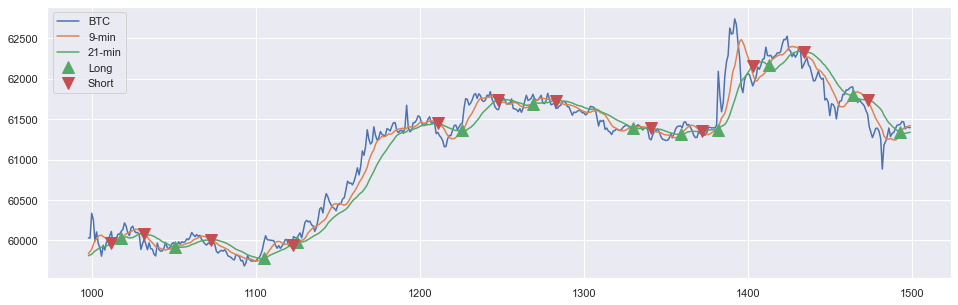

In [21]:
fig, ax = plt.subplots()
plt.plot(df2.iloc[-500:]['close'], label = 'BTC')
plt.plot(df2.iloc[-500:]['9-min'], label = '9-min')
plt.plot(df2.iloc[-500:]['21-min'], label = '21-min')
plt.plot(df2[-500:].loc[df2.entry == 2].index, df2[-500:]['9-min'][df2.entry == 2], "^",
        color = "g", markersize = 12, label= "Long")
plt.plot(df2[-500:].loc[df2.entry == -2].index, df2[-500:]['21-min'][df2.entry == -2], "v",
        color = "r", markersize = 12, label="Short")
plt.legend(loc=2);
plt.savefig('../web/assets/trendPositions.png')

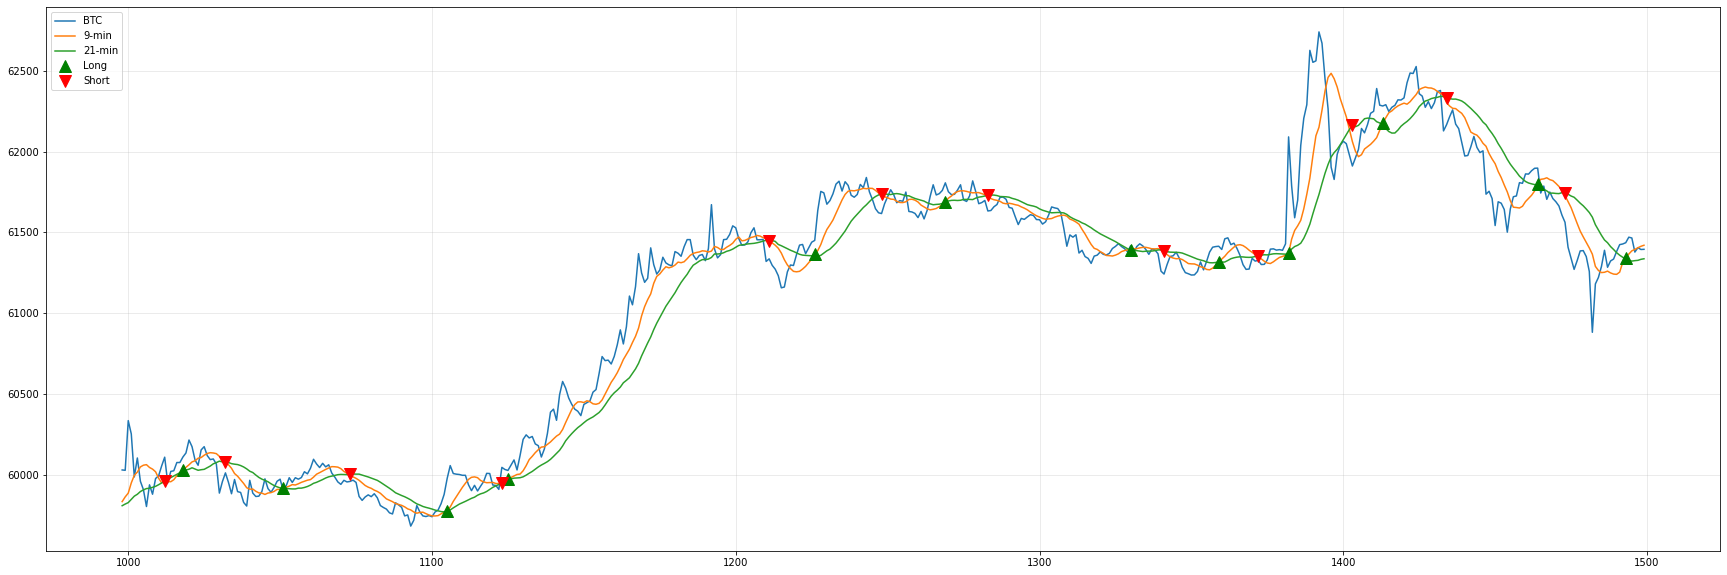

In [6]:
t = Algo.plot_positionT(df2)
t

# Trend Algo Performance

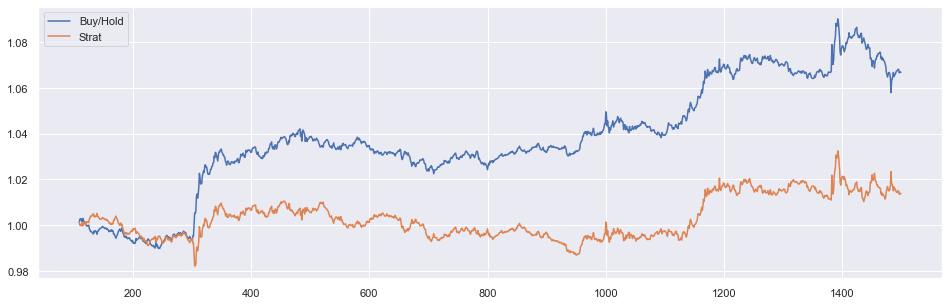

In [22]:
df2['trend_returns'] = df2.signal * df2.market_returns
plt.plot(np.exp(df2.market_returns).cumprod(),label = "Buy/Hold")
plt.plot(np.exp(df2.trend_returns).cumprod(),label = "Strat")
plt.legend()
plt.savefig('../web/assets/trendRets.png')

In [8]:
trendRets = Algo.trend_gainz(df2)
trendRets

Market Returns:  1.066957051390864
Trend Strategy Returns:  1.013818927073165


# Range positions

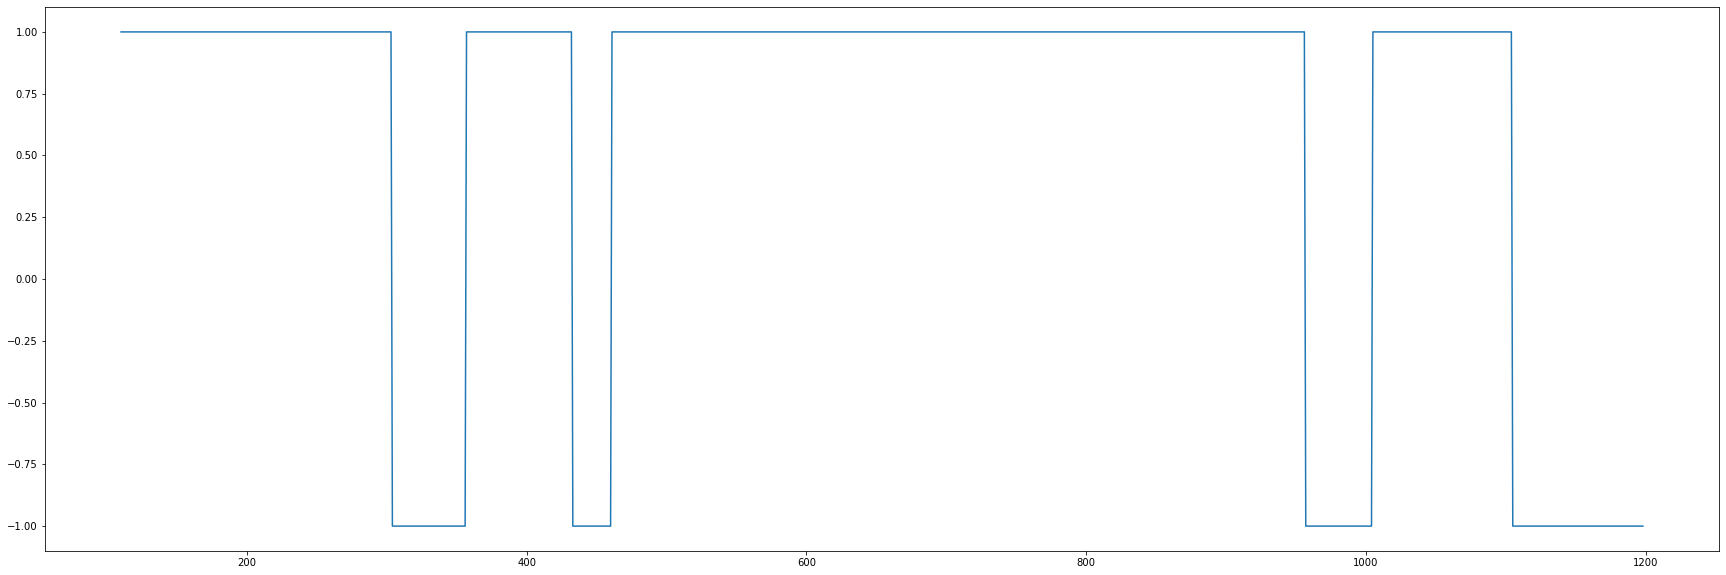

In [9]:
r = Algo.plot_positionR(df2.head(-300))
r
# always long or short never flat

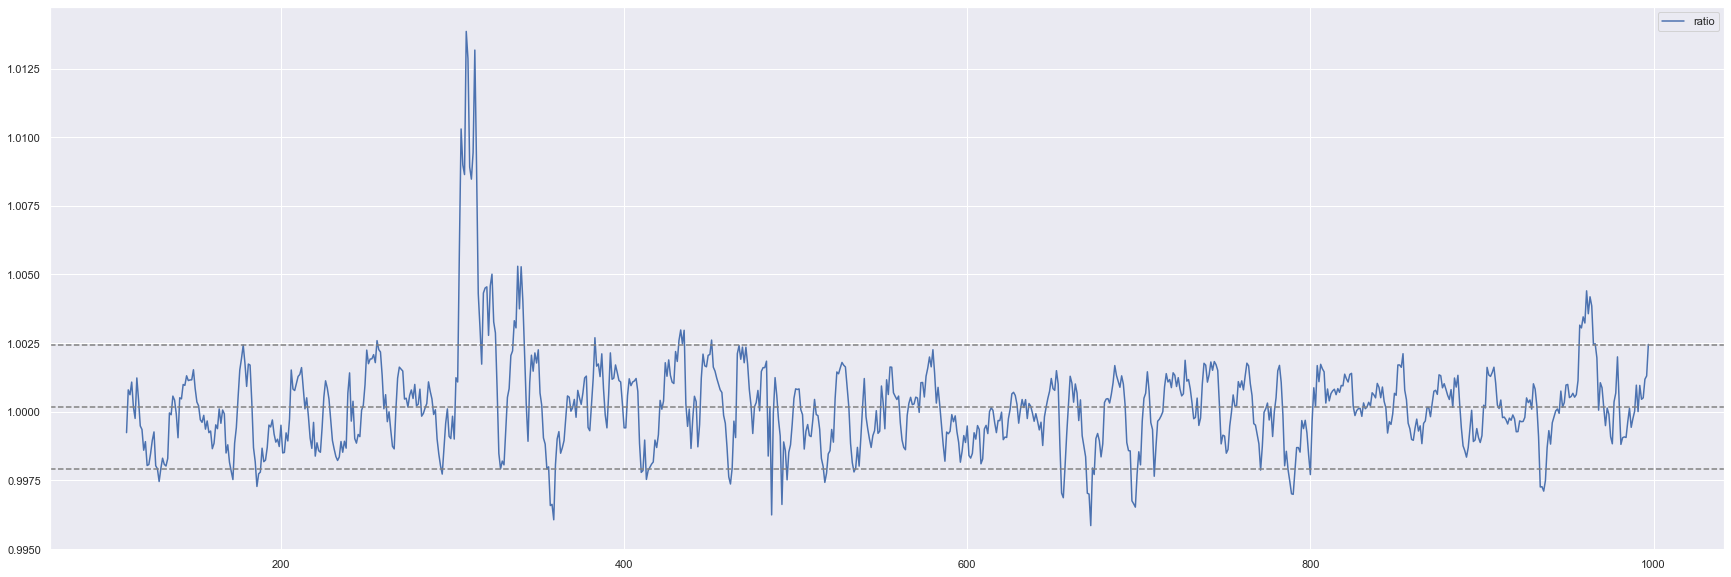

In [10]:
p = Algo.plot_percentiles(df2.head(-500))
p

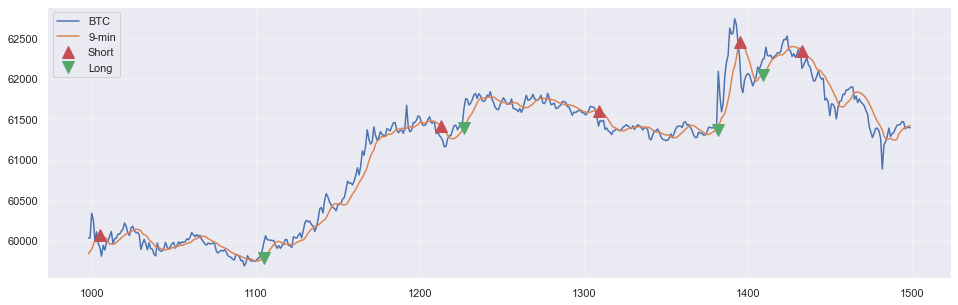

In [11]:
plt.rcParams['figure.figsize'] = 16.2, 5
plt.grid(True, alpha = .3)
plt.plot(df2.iloc[-500:]['close'], label = 'BTC')
plt.plot(df2.iloc[-500:]['9-min'], label = '9-min')
plt.plot(df2[-500:].loc[df2.entryR == 2].index, df2[-500:]['9-min'][df2.entryR == 2], "^",
        color = "r", markersize = 12, label= "Short")
plt.plot(df2[-500:].loc[df2.entryR == -2].index, df2[-500:]['9-min'][df2.entryR == -2], "v",
        color = "g", markersize = 12, label="Long")
plt.legend(loc=2);
plt.savefig('../web/assets/dualPlot.png')


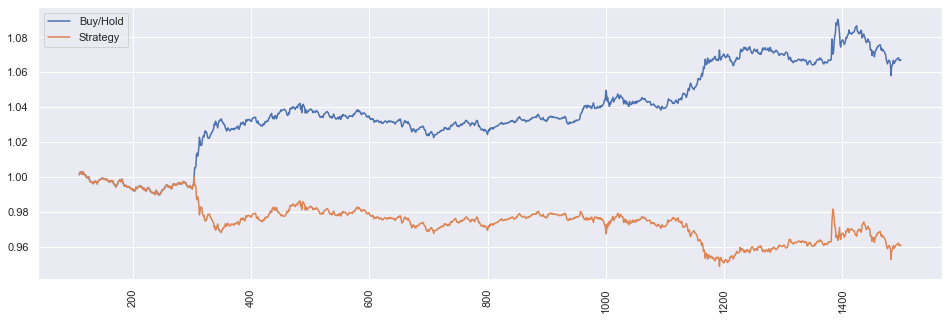

In [12]:
rangeRet = Algo.market_returnsR(df2)
rangeRet

In [13]:
rangeRets = Algo.range_gainz(df2)
rangeRets

Market Returns:  1.066957051390864
Range Strategy Returns:  0.9608056178941837


In [14]:
bestFit = df2[['time','close', 'market_returns','range_returns', 'trend_returns']]
bestFit.head(30)

,time,close,market_returns,range_returns,trend_returns
110,2021-10-14 23:05:00,57551.0,0.001304,0.001304,0.001304
111,2021-10-14 23:06:00,57630.0,0.001372,0.001372,-0.001372
112,2021-10-14 23:07:00,57617.0,-0.000226,-0.000226,0.000226
113,2021-10-14 23:08:00,57640.0,0.000399,0.000399,-0.000399
114,2021-10-14 23:09:00,57592.0,-0.000833,-0.000833,0.000833
115,2021-10-14 23:10:00,57564.0,-0.000486,-0.000486,0.000486
116,2021-10-14 23:11:00,57645.0,0.001406,0.001406,-0.001406
117,2021-10-14 23:12:00,57610.0,-0.000607,-0.000607,0.000607
118,2021-10-14 23:13:00,57562.0,-0.000834,-0.000834,0.000834
119,2021-10-14 23:14:00,57564.0,0.000035,0.000035,-0.000035


In [15]:
# bestFit['minuteTF_maxVal'] = np.where(bestFit['range_returns'] > bestFit['trend_returns'],
#                                             bestFit['range_returns'], np.nan)
# bestFit['minuteTF_maxVal'] = np.where(bestFit['range_returns'] < bestFit['trend_returns'],
#                                             bestFit['range_returns'], bestFit['minuteTF_maxVal'])
# bestFit['minuteTF_maxVal'] = np.where(bestFit['range_returns'] == bestFit['trend_returns'],
#                                             bestFit['range_returns'], bestFit['minuteTF_maxVal'])
# # bestFit['20m_maxVal'] = bestFit['minuteTF_maxVal'].shift(-20)
# fitList =  bestFit['minuteTF_maxVal'].shift(-20)


* check val in each algo_return, determine greatest val, declear winner
* if declared winner, iterate forward len(X_minutes) in winner col and append new val to list
* check both val at winning location for greatest val, decleare winner
* iterate forward len(X_min) in winning col and append val to list
* repeat, i think..

In [16]:
count=[]
selectVal = []
greatestVal = []
signal = ''
period = 3

for j, k in bestFit.iterrows():
    count.append(1)    
    if len(count) == period:
        selectVal.append(["time", k['market_returns'], "rangeRet", k['range_returns'], "trendRet", k['trend_returns']])
        if k['range_returns'] > k['trend_returns']:
            signal = -1
            greatestVal.append([ signal, k['range_returns']])
#             selectVal.append([k['range_returns'], signal])
#             np.insert(winnerVal, 1, greatestVal, axis = 1)
        elif k['range_returns'] < k['trend_returns']:
            signal = 1
            greatestVal.append([signal, k['trend_returns']])
#             selectVal.append([k['trend_returns'], signal])
        else:
            k['range_returns'] == k['trend_returns']
            signal = 0
            greatestVal.append([signal, k['trend_returns']])
#             selectVal.append([k['trend_returns'], signal])
        count = []

record=np.concatenate((selectVal,greatestVal), axis=1)
record

        
df3 = pd.DataFrame((record),
                     columns=['time', 'market_returns', 'range','rangeRet', 'trend', 'trendRet', 'winningAlgo', 'winnersRets'])   
df3.drop(['range', 'trend'], axis = 1, inplace=True)
record


array([['time', '-0.00022560240275559806', 'rangeRet', ...,
        '0.00022560240275559806', '1.0', '0.00022560240275559806'],
       ['time', '-0.00048629685907464193', 'rangeRet', ...,
        '0.00048629685907464193', '1.0', '0.00048629685907464193'],
       ['time', '-0.0008335359771312056', 'rangeRet', ...,
        '0.0008335359771312056', '1.0', '0.0008335359771312056'],
       ...,
       ['time', '0.00013022317014055318', 'rangeRet', ...,
        '0.00013022317014055318', '0.0', '0.00013022317014055318'],
       ['time', '-0.0014164193014813975', 'rangeRet', ...,
        '-0.0014164193014813975', '0.0', '-0.0014164193014813975'],
       ['time', '1.6287838684903022e-05', 'rangeRet', ...,
        '1.6287838684903022e-05', '0.0', '1.6287838684903022e-05']],
      dtype='<U32')

In [17]:
df3['addTrend'] = df3['trendRet'].shift(-1)
df3['addRange'] = df3['rangeRet'].shift(-1)
df3['result'] = np.where(df3['trendRet'] > df3['rangeRet'], df3['addTrend'], np.nan)
df3['result'] = np.where(df3['trendRet'] < df3['rangeRet'], df3['addRange'], df3['result'])
df3['result'] = np.where(df3['trendRet'] == df3['rangeRet'], df3['addRange'], df3['result'])
df3

,time,market_returns,rangeRet,trendRet,winningAlgo,winnersRets,addTrend,addRange,result
0,time,-0.00022560240275559806,-0.00022560240275559806,0.00022560240275559806,1.0,0.00022560240275559806,0.00048629685907464193,-0.00048629685907464193,0.00048629685907464193
1,time,-0.00048629685907464193,-0.00048629685907464193,0.00048629685907464193,1.0,0.00048629685907464193,0.0008335359771312056,-0.0008335359771312056,0.0008335359771312056
2,time,-0.0008335359771312056,-0.0008335359771312056,0.0008335359771312056,1.0,0.0008335359771312056,-0.00010430247727910569,0.00010430247727910569,-0.00010430247727910569
3,time,0.00010430247727910569,0.00010430247727910569,-0.00010430247727910569,-1.0,0.00010430247727910569,-0.00012183553957711979,0.00012183553957711979,0.00012183553957711979
4,time,0.00012183553957711979,0.00012183553957711979,-0.00012183553957711979,-1.0,0.00012183553957711979,0.001497475467017395,-0.001497475467017395,-0.001497475467017395
...,...,...,...,...,...,...,...,...,...
456,time,-0.0017118406462763858,-0.0017118406462763858,0.0017118406462763858,1.0,0.0017118406462763858,-0.0007659775959378834,0.0007659775959378834,-0.0007659775959378834
457,time,0.0007659775959378834,0.0007659775959378834,-0.0007659775959378834,-1.0,0.0007659775959378834,0.00013022317014055318,0.00013022317014055318,0.00013022317014055318
458,time,0.00013022317014055318,0.00013022317014055318,0.00013022317014055318,0.0,0.00013022317014055318,-0.0014164193014813975,-0.0014164193014813975,-0.0014164193014813975
459,time,-0.0014164193014813975,-0.0014164193014813975,-0.0014164193014813975,0.0,-0.0014164193014813975,1.6287838684903022e-05,1.6287838684903022e-05,1.6287838684903022e-05


In [18]:
df3.set_index('rangeRet')
df4 = df3.iloc[:-1 , :]
print(f' Dual Algo Returns over dataset 1minBTC: ', df3['result'].astype('float64').sum())
print(f'Market Buy/Hold Returns for same period: ', np.exp(bestFit.market_returns).astype('float64').cumprod().iloc[-1])
# when i try to sum it concatenates elements as strings, failed to convert to integer val
# also y output col have values that dont seem to be in range with the other values?

 Dual Algo Returns over dataset 1minBTC:  0.001867676766664772
Market Buy/Hold Returns for same period:  1.066957051390864


(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

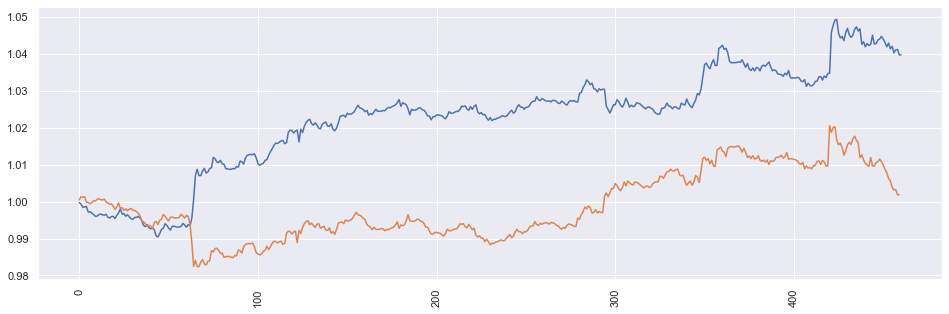

In [19]:
plt.plot(np.exp(df3['market_returns'].dropna().astype('float64')).cumprod(), label='Buy/Hold')
plt.plot(np.exp(df3['result'].dropna().astype('float64')).cumprod(), label='Strategy')
plt.xticks(rotation=90)

In [20]:
initial_capital = float(100000.0)

# Create df positions
positions = pd.DataFrame(index=df2.time.index).fillna(0.0)


# Buy 2 BTC
positions['BTC-PERP'] = 2*df['position']

# Initilize portfolio w value owned
portfolio = positions.multiply(df['close'], axis=0)

# Store diff in shares owned
pos_diff = positions.diff()

# Add 'holdings' to portfolio
portfolio['holdings'] = (positions.multiply(df['close'], axis=0)).sum(axis=1)

# Add 'cash' to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(df['close'], axis=0)).sum(axis=1).cumsum()

# Add 'total' to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add 'returns' to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

portfolio['time'] = df['time']
portfolio

,BTC-PERP,holdings,cash,total,returns,time
110,115102.0,115102.0,100000.0,215102.0,NaN,2021-10-14 23:05:00
111,115260.0,115260.0,100000.0,215260.0,0.000735,2021-10-14 23:06:00
112,115234.0,115234.0,100000.0,215234.0,-0.000121,2021-10-14 23:07:00
113,115280.0,115280.0,100000.0,215280.0,0.000214,2021-10-14 23:08:00
114,115184.0,115184.0,100000.0,215184.0,-0.000446,2021-10-14 23:09:00
...,...,...,...,...,...,...
1495,122932.0,122932.0,87600.0,210532.0,-0.000047,2021-10-15 22:10:00
1496,122758.0,122758.0,87600.0,210358.0,-0.000826,2021-10-15 22:11:00
1497,122812.0,122812.0,87600.0,210412.0,0.000257,2021-10-15 22:12:00
1498,122790.0,122790.0,87600.0,210390.0,-0.000105,2021-10-15 22:13:00
